In [21]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

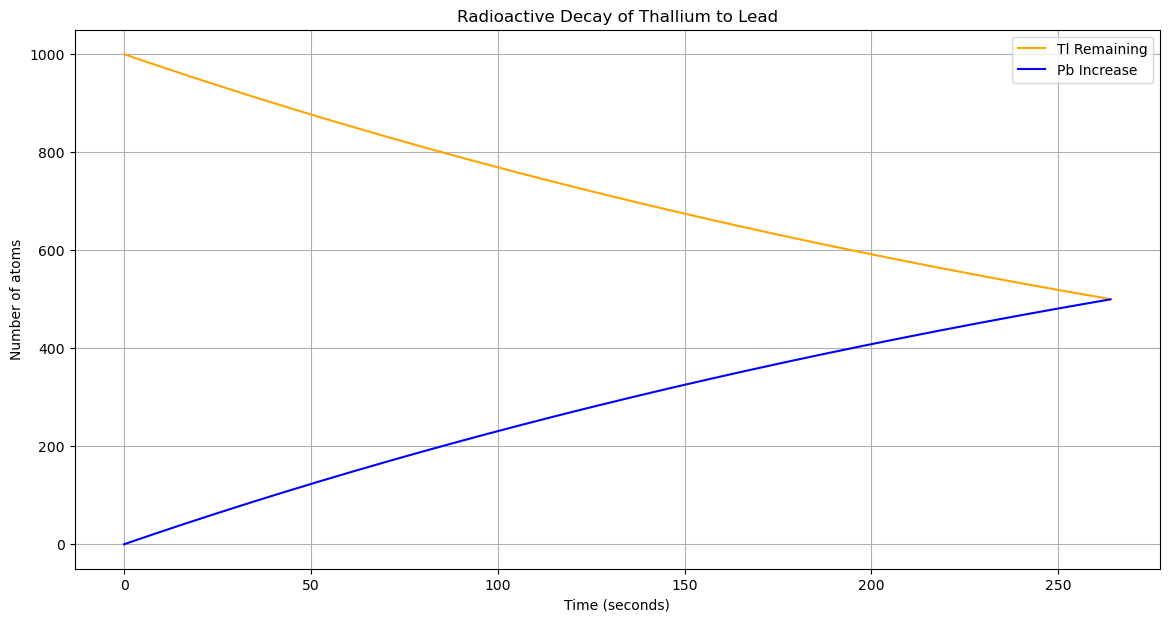

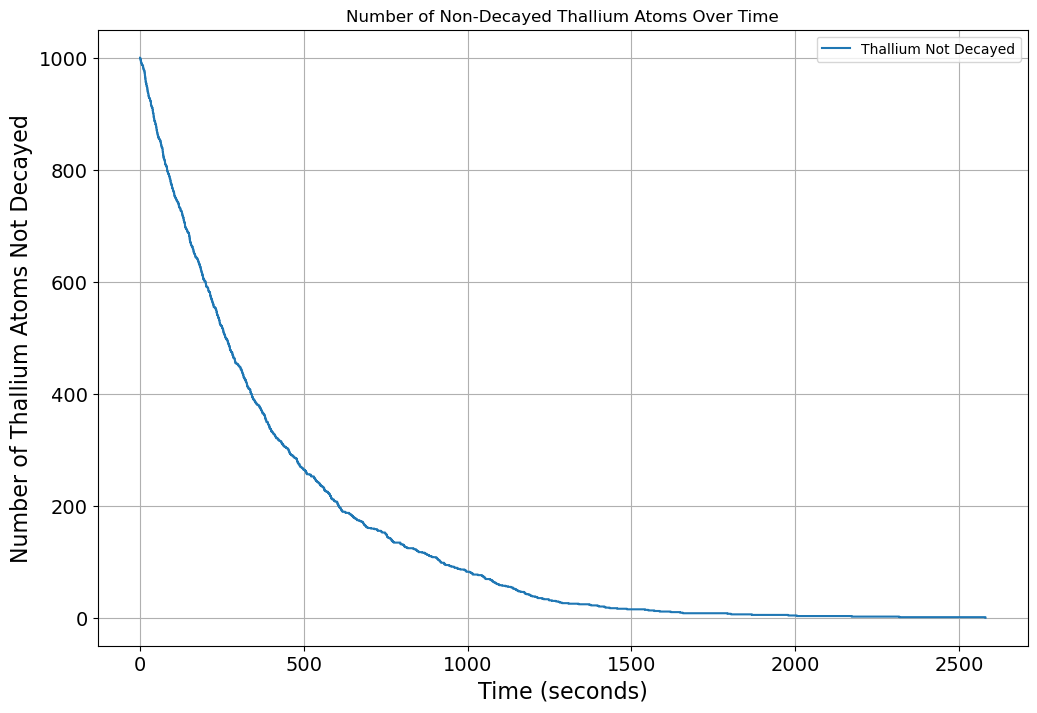

In [37]:
import numpy as np
import matplotlib.pyplot as plt

hl = 3.052 * 60
tau = hl/np.log(2)
Tl = 1000
#1
def p(t):
    return 1 - 2**(-t/tau)

Tl_remaining = [Tl]
Pb_atoms = [0]
time = np.arange(0, int(tau)+1, 1)

for t in range(1, int(tau)+1):
    decayed = p(1) * Tl_remaining[-1]
    Tl_remaining.append(Tl_remaining[-1] - decayed)
    Pb_atoms.append(Pb_atoms[-1] + decayed)
    
plt.figure(figsize=(14, 7))
plt.plot(time, Tl_remaining, color="orange", label="Tl Remaining")
plt.plot(time, Pb_atoms, color="blue", label="Pb Increase")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of atoms")
plt.title("Radioactive Decay of Thallium to Lead")
plt.legend()
plt.grid(True)
plt.show()

#2
def inverse_func(z):
    return -tau * np.log2(1 - z)

# Generate a sample of decay times
random_sample = np.random.uniform(0, 1, 1000)
t_decays_sampled = np.sort(inverse_func(random_sample))
# Calculate the number of non-decayed Thallium atoms at each sampled decay time
n_TL = Tl - np.arange(Tl)

# Plot the number of Thallium atoms that have not decayed over time
plt.figure(figsize=(12, 8))
plt.step(t_decays_sampled, n_TL, where='post', label='Thallium Not Decayed')
plt.xlabel('Time (seconds)', fontsize=16)
plt.ylabel('Number of Thallium Atoms Not Decayed', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.title('Number of Non-Decayed Thallium Atoms Over Time')
plt.grid(True)
plt.legend()
plt.show()

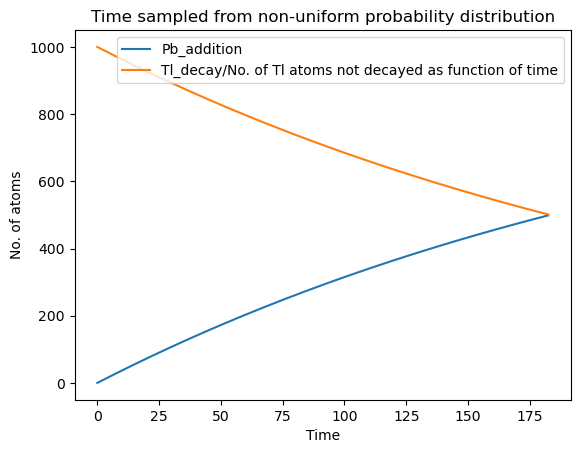

In [3]:
def nonuniform_pdf(t,tau=3.052*60):
    return 2**(-t/tau)*np.log(2)/tau

time = np.linspace(0,int(tau),10000)
nonuniform_prob = nonuniform_pdf(time)

indices = list(range(0,10000))

time_with_nonuniform_pdf = np.random.choice(time, size=1000, replace=False, p=(nonuniform_prob)/sum(nonuniform_prob))#p=[probabilities]
time_with_nonuniform_pdf = np.sort(time_with_nonuniform_pdf)

plt.plot(time_with_nonuniform_pdf,p(time_with_nonuniform_pdf)*1000,label='Pb_addition')
plt.plot(time_with_nonuniform_pdf,1000-p(time_with_nonuniform_pdf)*1000,label='Tl_decay/No. of Tl atoms not decayed as function of time')
plt.legend()
plt.title("Time sampled from non-uniform probability distribution")
plt.xlabel("Time")
plt.ylabel('No. of atoms')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
Z = 79
e = 1.6e-19
epsilon0 = 8.854e-12
E = (7.7e6)*e
N = int(1e6)
sigma = 1e-15/100
b = np.random.normal(scale=sigma,size=N)

theta = 2*np.arctan((Z*e**2)/(2*np.pi*epsilon0*E*b))

bounce_back = len(theta[theta>abs(np.pi/2)])

fraction_bounce_back = bounce_back/N

print("No. of particles that bounce back for given sigma=10^-17: ", fraction_bounce_back)

No. of particles that bounce back for given sigma=10^-17:  0.500268


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral by Monte-Carlo method:  0.72591
Integral by Mean value method 0.7266449443167223


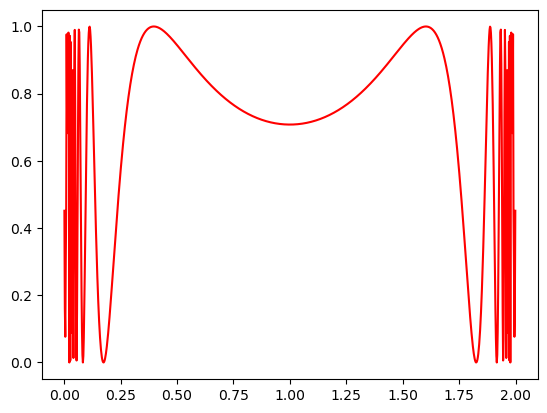

In [6]:
# Hit or Miss method or Monte-Carlo method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000) #at x=0 and x=2 very disturbing things happen. There exists singular points.
plt.plot(x,f(x),'r-')

N=100000
count=0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=count/N
print("Integral by Monte-Carlo method: ",I)

# Mean value method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

N=100000
x = np.random.uniform(size=N)
a = 0
b = 1
I = ((b-a)/N)*sum(f(x))
print("Integral by Mean value method",I)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
#Monte Carlo without for loop
N = 1000000
r=1 #radius
x = np.random.uniform(-1.0,1.0,size=N)
y = np.random.uniform(-1.0,1.0,size=N)
distance = x**2+y**2
points_inside = len(distance[np.sqrt(distance)<=r])
#print(points_inside)
area = 4*(points_inside/N)
print("Area of the circle: ",area)

# 10D Monte Carlo generalisation without for loop
def nSphereVolume(dim, N):
    point = np.random.uniform(-1.0, 1.0, size=[N,dim])
    distance = np.apply_along_axis(np.linalg.norm, 1, point)
    count_in_sphere = len(distance[distance<=1])
    #print(count_in_sphere)
    return np.power(2.0, dim) * (count_in_sphere / N)

print("Volume of a 10D sphere: ",nSphereVolume(10, 100000))
print("Area of a circle: ", nSphereVolume(2,100000))

Area of the circle:  3.143616
Volume of a 10D sphere:  2.46784
Area of a circle:  3.13356


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [8]:
def f(x):
    return x**-0.5/(np.exp(x)+1)

def w(x):
    return np.sqrt(x)**-1

def inv_transform(x):
    return np.square(x)/4

n = int(1e6)
x = np.random.uniform(0,2,size=n)
ws = inv_transform(x)
I = (np.sum(f(ws)/w(ws))*2)/n

print(np.round((I),2))

0.84
